In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import scipy.io
import time


## Load and visualize data

In [26]:
mat = scipy.io.loadmat('linear_svm.mat')
X_train = mat["X_train"]
X_test = mat["X_test"]
y_train = mat["labels_train"]
y_test = mat["labels_test"]

## Define SVM problem and solve it with CVXOPT
Soft-margin formulation of the problem

In [27]:
N,M = X_train.shape

In [28]:
C = 5
P = np.zeros([N+1+M, N+1+M])
for i in range(M):
    P[i,i] = 0.5

q = np.zeros([N+1+M,])
for i in range(1,N+1):
    q[-i] = C

G = np.zeros([2 * N, N + 1 + M])
for i in range(N):
    G[i, :M] = y_train[i] * X_train[i]
    G[i, M] = y_train[i]
    G[i, M + 1 + i] = 1
    G[N + i, M + 1 + i] = 1
G = - G 

h = np.concatenate((- np.ones([N,]), np.zeros([N,])))

In [47]:
cvxopt_solvers.options['reltol'] = 1e-5 # stopping condition

P = cvxopt_matrix(P)
q = cvxopt_matrix(q)
G = cvxopt_matrix(G)
h = cvxopt_matrix(h)

t1 = time.time()
sol = cvxopt_solvers.qp(P, q, G, h)
t2 = time.time()
x = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -2.1452e+03  1.4653e+03  5e+03  1e+01  6e+00
 1:  3.6479e+01 -1.7299e+02  7e+02  1e+00  6e-01
 2:  1.4470e+01 -2.7684e+01  1e+02  2e-01  9e-02
 3:  1.6862e+01  4.2971e+00  2e+01  3e-02  2e-02
 4:  1.8393e+01  1.0356e+01  1e+01  1e-02  6e-03
 5:  1.7239e+01  1.3862e+01  3e+00  3e-15  4e-14
 6:  1.5448e+01  1.5208e+01  2e-01  2e-15  1e-13
 7:  1.5337e+01  1.5332e+01  4e-03  2e-15  4e-13
 8:  1.5335e+01  1.5335e+01  2e-04  2e-15  2e-12
 9:  1.5335e+01  1.5335e+01  2e-06  2e-15  3e-13
10:  1.5335e+01  1.5335e+01  2e-08  2e-15  1e-13
11:  1.5335e+01  1.5335e+01  2e-10  2e-15  5e-14
Optimal solution found.


In [39]:
# Extract parameters w and b
w = x[:M]
b = x[M]

## Evaluate model
On test set

In [43]:
print("************ Accuracy *****************")
(np.sign(np.matmul(X_test, w) + b) == y_test).sum() / y_test.shape[0]

************ Accuracy *****************


0.9788888888888889

In [48]:
t2-t1

0.0370938777923584

In [32]:
np.save("w_OtSP", w)
np.save("b_OtSP", b)

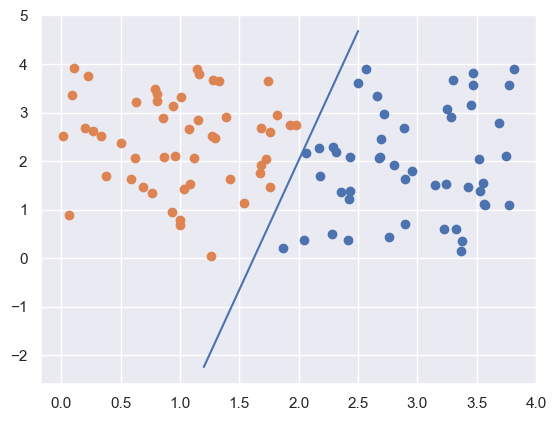

In [36]:
# Plot separation surface
plt.scatter(X_train[y_train.reshape(-1,)==1,0], X_train[y_train.reshape(-1,)==1,1])
plt.scatter(X_train[y_train.reshape(-1,)==-1,0], X_train[y_train.reshape(-1,)==-1,1])
plt.plot(np.linspace(1.2,2.5), np.linspace(1.2,2.5) * (-w[0]/w[1]) - b[0]/w[1])